In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

C:\Users\agnes\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\agnes\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:

stock_data = pd.read_csv(r"C:\Users\agnes\Documents\apziva_ai_residency\project5\data\appl_data.csv")


stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
stock_data = stock_data.set_index(['Date'])
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


In [3]:

df_close = stock_data['Close']
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [4]:

forecast_steps = len(test_data)
ses_model = SimpleExpSmoothing(train_data)
ses_model_fitted = ses_model.fit()
ses_predictions = ses_model_fitted.predict(start=1, end=forecast_steps)

C:\Users\agnes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


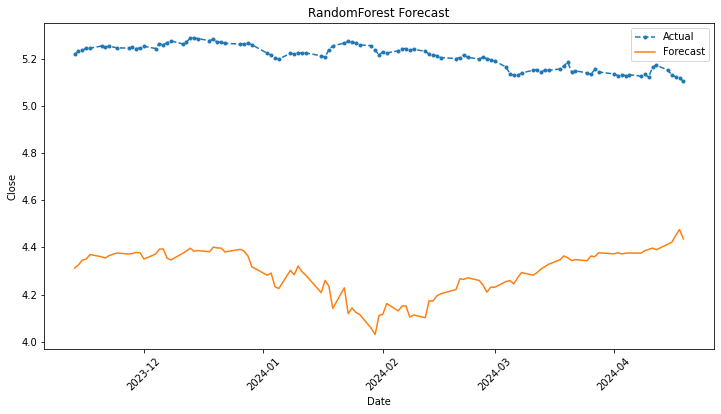

In [5]:
# Actual vs Fitted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Actual", marker='.', linestyle='--')
plt.plot(test_data.index, ses_predictions, label="Forecast")
plt.title("RandomForest Forecast")
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation=45)
plt.legend()

plt.show()